In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
data = sp.genfromtxt("web_traffic.txt")

In [3]:
print(data[:10])
print(data.shape, data.ndim)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2) 2


### Preprocessing and cleaning the data

(735,) (735,)


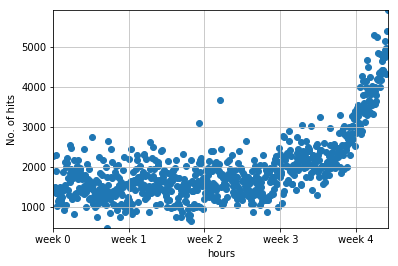

In [4]:
#The first vector, x, will contain the hours, and the other, y, will contain
#the Web hits in that particular hour.
x = data[:,0]
y = data[:,1]
#print(x,y)
# to remove Nan values from both x and y, if at all exist
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
print(y.shape, x.shape)
#to get the  first impression of our data, we can plot the data
plt.scatter(x,y)
plt.xlabel("hours")
plt.ylabel("No. of hits")
plt.xticks([w*7*24 for w in range(10)],
['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
plt.show()

In [5]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [6]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: %s" % fp1)
print(residuals)
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]
317389767.34


179983507.878
121942326.364


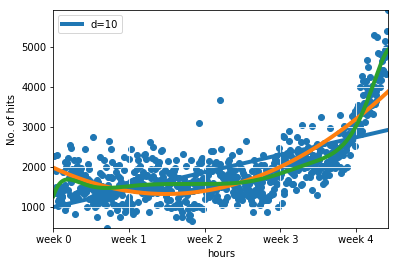

In [15]:
#to get the  first impression of our data, we can plot the data
plt.scatter(x,y)
plt.xlabel("hours")
plt.ylabel("No. of hits")
plt.xticks([w*7*24 for w in range(10)],
['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.grid(True, linestyle='-', color='1')

f2p = sp.polyfit(x, y, 2)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

f10p = sp.polyfit(x, y, 10)
f10 = sp.poly1d(f10p)
print(error(f10, x, y))

plt.plot(fx, f2(fx), linewidth=4)
plt.legend(["d=%i" % f2.order], loc="upper left")
plt.grid(True, linestyle='-', color='1')

plt.plot(fx, f10(fx), linewidth=4)
plt.legend(["d=%i" % f10.order], loc="upper left")
plt.grid(True, linestyle='-', color='1')
x
plt.show()

In [22]:
inflection = int(3.5*7*24)
xa = x[:inflection]
ya = y[:inflection]

xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


In [21]:
xa = x[:inflection]

TypeError: slice indices must be integers or None or have an __index__ method